# <span style="color:green"> Laboratorio di Simulazione Numerica (NSL) </span>
## <span style="color:blue">  Esercitazione 8</span>

## Particella quantistica in una dimensione (1D)

### Obiettivo

In questa esercitazione si applicano tecniche di **campionameno stocastico** a calcoli di natura **quantistica**. 

In particolare il sistema studiato è quello di una **singola** particella quantistica in una dimensione spaziale (**1D**) confinata da un potenziale esterno:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Di questo sistema si intende calcolare l'energia di **Ground State**, ovvero il valore di aspettazione dell'hamiltoniana sulla funzione d'onda che descrive lo stato fondamentale della particella quantistica unidmensionale vincolata dal potenziale esterno V. 

Per fare ciò è necessario quindi realizzare la minimizzazione della seguente quantità:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2}
$$
che sappiamo essere inferiormente limitata dall'energia di G.S. dell'hamiltoniana $\hat H$ per qualunque scelta della funzione d'onda $\Psi^*_T$.
Per risolvere questo problema è quindi necessario saper trovare il valore $\langle {\hat H} \rangle_T$, data una qualsiasi funzione $\Psi^*_T$. L'integrale non è risolvibile per via analitica e viene, infatti, introdotto un metodo Monte Carlo quantistico, adatto per trovare soluzioni di tipo numerico: il **Variational Monte Carlo (VMC)**.

Successivamente sfruttando l'algoritmo di ottimizzazione stocastica **Simulated Annealing**, una volta definita la funzione 
$
\Psi_T^{\sigma,\mu}(x) 
$
si andrà a minimizzare la quantità $\langle {\hat H} \rangle_T^{\sigma,\mu}$ rispetto ai parametri $\mu$ e $\sigma$ per andare a trovare il valore che più si avvicina al minimo dell'energia $E_o=E_{G.S.}$.

Infine i risultati ottenuti con queste tecniche, che sfruttano il campionamento di densità di probabilità realizzato con l'agoritmo di **Metropolis**, verranno *confrontati* con i valori attesi per sottolinearne analogie e differenze.

### Esercizio 8.01:  Variational Monte Carlo (VMC)

Il **principio variazionale** afferma che, dato un modello hamiltoniano, presa una qualunque **funzione d'onda di prova** (o tentativo) $\Psi_T(x)$ il valore di aspettazione dell'energia su tale funzione, che viene detto **energia variazionale** $E_T$ , è maggiore uguale al valore di aspettazione sullo stato fondamentale: 
$$
E_T = \langle {\hat H} \rangle_T = \frac{\langle \Psi_T| {\hat H} | \Psi_T\rangle}
{\langle \Psi_T| \Psi_T\rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$
dove il valore minimo delle'energia variazionale coincide con l'energia di GS se la $\Psi_T(x)$ = $\Psi_0(x)$.

Il metodo varazionale consiste nell'usare una **famiglia** di funzioni d'onda di prova parametrizzate da un'insieme di **parametri variazionali** (e eventualmente *ottimizzare* questi ultimi per *minimizzare* l'energia variazionale del sistema ottenendo una buona **approssimazione** del Ground State). Dalla funzione tentativo ottimizzata si possono studiare proprietà approssimate dello stato fondamentale. 

Come modello approssimato del GS del sistema studiato in questa esercitazione è stata proposta la seguente funzione d'onda di prova:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
proporzionale alla **somma di due Gaussiane** centrate rispettivamente in $\pm\mu$ e di larghezza (deviazione standard) $\sigma$, con $\mu$ e $\sigma$ parametri variazionali. Si noti che la funzione d'onda suggerita è simmetrica, come è atteso, data la stessa natura simmetrica del potenziale esterno che confina il sistema che è pari.

A questo punto il metodo **Monte Carlo Variazionale** per una singola perticella quantistica in una dimensione sfrutta l'algoritmo di Metropolis per campionare il modulo quadro di una funzione d'onda tentativo $|\Psi_T(x)|^2$ usando una probabilità di transizione uniforme $T(x_{new}|x_{old})$ centrata sulla vecchia configurazione (posizione) e di ampiezza delta. 
In questo modo è possibile determinare il valore di aspettazione dell'hamiltoniana valutando un integrale monodimensionale come per qualunque altro metodo MC:
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
dove nel terzo passggio si è moltiplicato e diviso per la funzione d'onda di prova e $E_{loc}(x) = \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$ viene detta **energia locale**.

Ripetendo il campionaemtno e la simulazione Monte Carlo è possibile ottimizzare i parametri per minimizzare $\langle {\hat H} \rangle_T$.

Per scrivere il codice C++ che implementi il VMC è stata ereditata la medesima struttura del programma della precedente esercitazione che simulava un sistema di Lennard-Jones nell'ensemble canonico NVT con l'algoritmo di Metropolis che campionava il peso statistico di Boltzmann. 

In questo caso il Metropolis campiona un modulo quadro di una funzione d'onda, interpertabile come una densità di probabilità (si ricordi che tale tecnica permette di non considerare la normalizzazione che si semplifica nel calcolo della probabilità di accettazione) proponendo una mossa con una transizione uniforme di ampiezza delta. La nuova coordinata generata potrà essere accetata, e viene campionata, oppure in caso contrario viene ricampionata la configurazione di partenza. Iterando questo procedeimrnto, in breve tempo e asintoticamente, viene realizzato il corretto campionamento della densità di probabilità.

Quello che è stato appena descritto rappresenta il cuore del programma. Quest'ultimo, entrando più nello specifico, viene inizializzato, mediante la routine *Input()*, leggendo il valore di alcuni parametri importanti per la simulazione dal file *input.dat*, quali: 

1) I due parametri variazionali iniziali da ottimizzare $\mu$ e $\sigma$.

2) la configurazione o posizione iniziale da cui parte il campionamento, $start_{position}$

3) L'ampiezza iniziale della transizione uniforme, $deltaVMC$ , il cui valore viene stato settato in modo da soddisfare la regola empirica del 50% per la probabilità di accettazione del Metropolis.

4) il numero di blocchi, $N_{blk} = 100$ e il numero di steps per ciascun blocco, $N_{steps} = 5000$.

5) I parametri per l'istogramma riempito con le configurazioni campionate, $nbins = 100 $ numero dei bins, $histogram_{start} = -5$ e $histogram_{end} = 5$ il dominio dell'istogramma.

Per effettuare la misura (routine *VMCMeasure()*) dell'osservabile energia locale, come dedotto dalle formule precedenti, bisogna applicare l'hamiltoniana , che è la somma di un termine cinetico e uno potenziale, alla funzione d'onda tentativo. In rappresentazione delle coordinate questo significa (si noti che il programma lavora in unità di $h_{bar} = 1$ e $ m =1 $) applicare il laplaciano (che in una dimensione coincide con la derivata seconda rispetto a x) alla funzione d'onda e sommare al contributo cinetico la banale moltiplicazione del potenziale esterno V e della funzione d'onda di prova:
$$
E_{loc}(x) = \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = \frac{({-\frac{d^2}{dx^2} + V(x)}) \Psi_T(x)}{\Psi_T(x)} = \frac{-\Psi_T^{''}(x) + V(x)\Psi_T(x)}{\Psi_T(x)}
$$

Per tale motivo nel programma sono state incluse delle funzioni che permettono di valutare il potenziale esterno, la funzione d'onda di prova e la derivata seconda della $\Psi_T(x)$ nella coordinata x (*Psi(double x , int iQM1D)* e *DerSecPsi(double x, int iQM1D)*).
Queste funzioni permettono di implementare la misura anche nel caso di **Oscillatore Armonico Q1D**, settando *iQM1D=1*, che nella simulazione è stato utile per verificare il corretto funzionamento del metodo V.M.C.

Una volta effettuata la singola misura i valori vengono accumulati per essere mediati sugli step della simulazione ed usando la tecnica del **data blocking** si ottengono le stime dell'energia variazionale $\langle {\hat H} \rangle_T^{\sigma,\mu}$ con le realtive incertezze statistiche in funzione del numero di blocchi (o degli steps MC della simulazione) fissati i parametri della funzione d'onda tentativo.
 
 
Di seguito sono riportati i risultati del test dell'algoritmo VMC sull'Oscillatore armonico quantistico 1D, ricevendo in ingresso proprio il ground state $\Psi_o =e^{-\frac{x^2}{2}}$ del potenziale $V(x)=\frac{x^2}{2}$. Come si può evincere la stima dell'energia di Ground State è esatta e i dati campionati secondo la $\left |\Psi_o \right |^2 = e^{-x^2}$ seguono molto bene l'andamento analitico.

In [13]:
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import scipy.stats as stats


plt.rc('text', usetex=True)
plt.rc('font', family='serif')


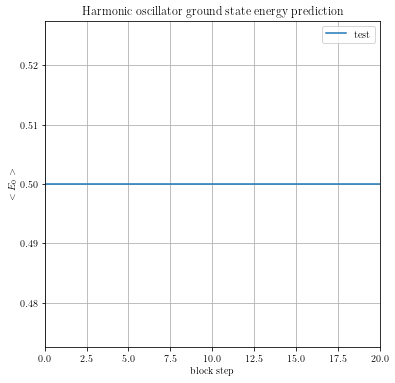

In [14]:
filename="VMC_SA/VMC_test_OA1D_energy.dat"
x, y=np.loadtxt(filename, usecols=(0,1), unpack=True)


fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(x, y, label="test") 
ax.set_xlabel('block step')
ax.set_xlim([0,20])
ax.set_ylabel(f"$<E_0>$")
ax.set_title("Harmonic oscillator ground state energy prediction")
ax.legend()
ax.grid(True)



mu_fit:  -0.005135789713749998 sigma_fit:  0.7076586790636485
mu_real:  0 sigma_real:  0.7071067811865476


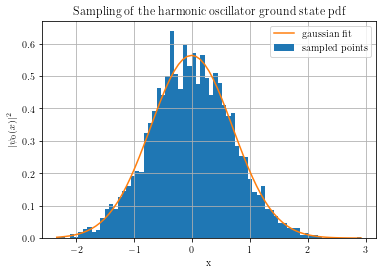

In [15]:
points = np.loadtxt("VMC_SA/VMC_test_OA1D_sampling.dat")

_, bins, _ = plt.hist(points, bins=70, density=True, label="sampled points")
mu, sigma = stats.norm.fit(points)
normal_fit = stats.norm.pdf(bins, mu, sigma)
plt.plot(bins, normal_fit, label="gaussian fit")
plt.xlabel('x')  
plt.ylabel(r'$|\psi_0(x)|^2$')
plt.title('Sampling of the harmonic oscillator ground state pdf')
plt.grid()
plt.legend()

print("mu_fit: " , mu, "sigma_fit: ", sigma)
print("mu_real: " , 0 , "sigma_real: ", np.sqrt(2)/2)



### Esercizio 8.02:  Simulated Annealing (SA)

Il metodo di ottimizzazione *stocastica* del SA pone le sue fondamenta in un **analogia** con un sistema termodinamico dove, nello specifico, un liquido viene *raffreddato* in modo sufficientemente **lento** al punto tale che alla fine del processo i gradi di libertà del sistema, che progressivamente perdono la loro mobilità termica, si dispongano secondo una struttura cristallina che identifica uno stato di minima energia potenziale per il sistema.  L'essenza di questo procedimento è che il raffreddamento avvenga lentamente lasciando tempo ai gradi di libertà di redistribuirsi all'abbassarsi della temperatura.

Ora il punto di svolta sta nel fatto che ogni problema di ottimizzazione può essere interpretato come un problema di annealing nel contesto della **meccanica statistica**. Identificando la funzione costo del problema di ottimizzazione come la funzione energia di un sistema in meccanica statistica caratterizzato dalla funzione di distribuzione di probabilità data dal peso di Boltzmann $p(x) = \frac{e^{-\beta L^{(1)}(x)}}{Z}$. 
Con i metodi MC e l'algoritmo di Metropolis è possibile campionare quest'ultima al variare del parametro $\beta$ che rappresenta una temperatura inversa **fittizia**. Nel limite di temperature basse ($\lim_{ \beta \to \infty }$), ossia raffredando il sistema, la densità di probabilità si concentrerà sui minimi della funzione costo $L^{(1)}$, la condizione necessaria per risolvere il problema di ottimizzazione.

Quindi, di solito si prepara una **annealing schedule** che consiste nel programmare una tabella riportante il numero di passi MC $N_i$  che il sistema dovrà passare ad una certa temperatura inversa $\beta_{i}$ (blocco MC a fissata temperatura).

Partendo da una configurazione iniziale $\vec{x}_0$, abbassando lentamente la temperatura dopo ogni blocco, la simulazione del sistema consisterà nell'eseguire gli steps MC prefissati nello schedule per ogni valore di $T_i$ producendo e simulando una catena di Markov-discreta campionando nuove configurazioni secondo la distribuzione del peso di Boltzmann data per l'attuale valore del parametro $\beta_{i}$ e accettando la mossa proposta  con una classica probabilità di accettazione del Metropolis:

$$
A (\vec{x_{new}}, \vec{x_{old}}) = \begin{cases} e^{-\beta (L^{(1)}(\vec{x_{new}})-L^{(1)}(\vec{x_{old}})}) & \mbox{se } L^{(1)}(\vec{x_{new}}) > L^{(1)}(\vec{x_{old}}) \\ 1 & \mbox{altrimenti}
\end{cases}
$$

dove $\vec{x_{new}}$, $\vec{x_{old}}$ sono la vecchia configurazine campionata e la nuova proposta e $L^{(1)}(\vec{x_{new}})$, $L^{(1)}(\vec{x_{new}})$ i relativi valori di energia (o della funzione costo) associati.
Nel nostro particolare caso $\vec{x} = (\mu,\sigma)$ e $L^{(1)}(\vec{x}) = \langle {\hat H} \rangle_T^{\sigma,\mu}$, ossia la funzione costo è proprio l'energia della particolare configurazione quantistica selezionata.

**N.B.**: il programma usa unità con $k_B = 1$. 


La difficoltà dell'esercizio consiste nell'integrare l'algoritmo di SA con quello di VMC in modo tale da minimizzare, al variare dei parametri $\mu$ e $\sigma$, il valore di $\langle {\hat H} \rangle_T^{\sigma,\mu}$.

Questo viene fatto implementando le seguenti strategie:
- Viene implementata la routine **SAMove()**, che muovendo in direzione casuale in uno spazio 2D i parametri $(\mu,\sigma)$, compiendo passi di lunghezza massima  *deltaSA*, decide se accettare o meno una mossa secondo il modello descritto sopra, calcolado l'energia  $\langle {\hat H} \rangle_T^{\sigma,\mu}$ della configurazione selezionata e confrontandola con l'energia delle vecchia configurazione.
- L'energia  $\langle {\hat H} \rangle_T^{\sigma,\mu}$ viene calcolata tramite VMC tramite *datablocking*, di cui viene conservato solamente l'ultima media ed errore progressivo
- Per rendere l'algoritmo più efficiente e permettergli di raggiungere in tempi più rapidi il minimo viene inoltre implementato un controllo sul valore dell'energia da sottoporre all'Accettazione: solamente un valore srettamente scorrelato dal precedente valore simulato viene ammesso. Se questo non succede si ripete il calcolo dell'energia aumentando il numero di blocchi totali. Questo **filtro** non è necessario, nè vincolante per la soluzione del problema e infatti dopo 200 tentativi falliti di ricerca di un'energia scorrelata, per una data configurazione, il filtro non viene più applicato
- Viene implementata la funzione **FindDelta()**. Essendo che l'accettazione delle mosse Metropolis per il VMC dipende fortemente dalla configurazione $(\mu,\sigma)$ in cui ci troviamo, questo modulo si occupa di risettare il parametro *deltaVMC* in modo da avere un campionamento VMC con accettazione nell'intorno di 50% (aumentare/diminuire il valore di *deltaVMC* diminuisce/aumenta il rate di accettazione del VMC).
- Viene decisa una **annealing temperature schedule**. Dato che nel caso di SA la pdf da campionare non ha una ben definita scrittura analitica non è possibile per questo algoritmo definire un analogo della funzione *FindDelta()*. Tramite esecuzioni manuali dell'algoritmo stesso sono quindi state selezionate delle coppie $(T_i, deltaSA_i)$ tali da mantenere anche in questo caso l'accettazione del SA nell'intorno di 50%
- Il numero di esecuzioni per ogni temperatura *NSA_step=1000* è fornito dal file *input.dat* ed è scelto in modo tale da lasciare abbastanza tempo al sistema per trovare la configurazione di equilibrio a quella data temperatura 

Le temperature scelte sono mostrate nella cella successiva.

In [16]:
T = [50, 18, 7, 2.5, 0.9 , 0.3 , 0.12 , 0.05 , 0.015 , 0.006];
T = np.array(T)
beta = [ 1/x for x in T]
beta = np.array(beta)

Di seguito sono riportati gli andamenti del valore di $\langle {\hat H} \rangle_T^{\sigma,\mu}$ all'aumentare del numero di passi del SA e al diminuire della temperatura T (ossia all'aumentare di $\beta$).

**N.B.** La scala sull'asse delle ascisse è logaritmica nel secondo grafico

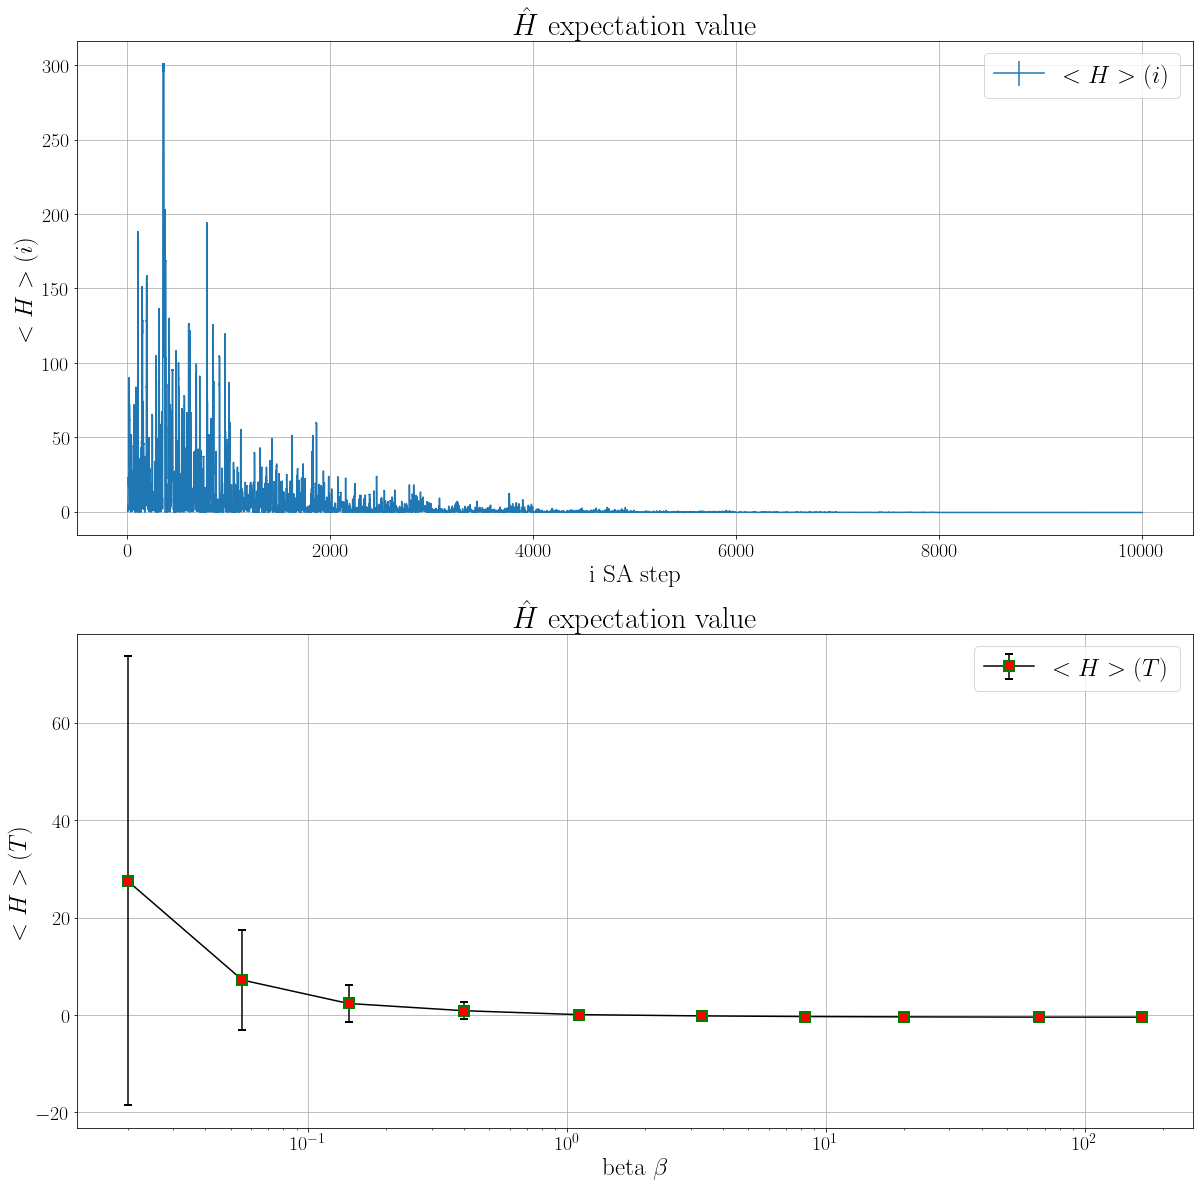

In [20]:
def load_H_data(Y_file) : 
    Y , Y_err = np.loadtxt(Y_file, usecols = (1,2) ,unpack=True)
    return  Y ,Y_err

def plot_H_data(ax, x, y, err,  observable , lab) :
    ax.errorbar(x, y , yerr=err, label = lab)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('i SA step' , fontsize=25)
    ax.set_ylabel(f"{observable}" , fontsize=25)
    ax.set_title("$\hat{H}$ expectation value", fontsize=30)
    ax.legend(prop={'size': 25})
    ax.grid(True)
    
def plot_Ht_data(ax, x, y, err,  observable , lab) :
    ax.errorbar(x, y , color = 'black' , yerr=err, label = lab  , marker='s', mfc='red',
         mec='green', ms=10, mew=2 , capsize = 4)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel(r'beta $\beta$' , fontsize=25)
    ax.set_ylabel(f"{observable}" , fontsize=25)
    ax.set_xscale("log")
    ax.set_title("$\hat{H}$ expectation value", fontsize=30)
    ax.legend(prop={'size': 25})
    ax.grid(True)
    
    

#setting up variables: energy at every SA step and at every beta
H_vec  , H_vec_err= load_H_data("VMC_SA/output_EnMin.dat")
SA_steps = np.arange(len(H_vec))+1;

appo_vec = np.zeros(1000)
mean_vec = np.zeros(10)
std_vec = np.zeros(10)

for j in range(10):
    for i in range(1000):
        appo_vec[i] = H_vec[j*1000 + i]
    
    
    mean_vec[j] = np.mean(appo_vec)
    std_vec[j] = np.std(appo_vec)



fig , axes = plt.subplots(2 , figsize=(20, 20) )

plot_H_data(axes[0] , SA_steps , H_vec , H_vec_err , "$<H>(i)$", "$<H>(i)$")
plot_Ht_data(axes[1] , beta , mean_vec , std_vec , "$<H>(T)$", "$<H>(T)$")


- Come atteso il valore dell'energia $\langle H \rangle$ tende a diminuire all'aumentare del numero di passi e al diminuire della temperatura. Il lento "raffreddamento" porta il sistema a muoversi sempre di più verso il minimo

Un riscontro grafico di questa affermazione è mostrato nel seguente grafico che mostra il movimento casuale dei parametri $(\mu,\sigma)$ al diminuire della temperatura. Si osserva molto bene come il sistema vada a concentrarsi in regioni sempre limitate dello spazio delle configurazioni. 

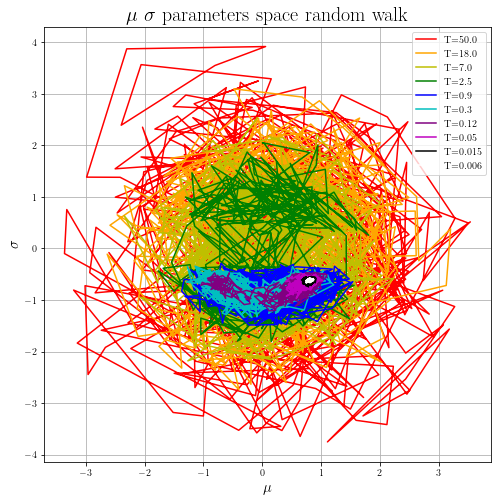

In [310]:
mu_vec , sigma_vec = np.loadtxt("VMC_SA/output_EnMin.dat", usecols = (3,4) ,unpack=True)
Color=["r", "orange" ,"y" , "g", "b","c", "purple","m" ,  "black" , "white"]
l=1000


plt.figure(figsize=(8, 8))
for i in range(len(Color)) :
    plt.plot(mu_vec[i*l:(i+1)*l], sigma_vec[i*l:(i+1)*l], Color[i] , label ="T=" + str(T[i]))
plt.xlabel(f"$\mu$", fontsize=15)
plt.ylabel(f"$\sigma$" ,fontsize=15)
plt.title(r"$\mu$ $\sigma$ parameters space random walk", fontsize=20)
plt.grid(True)
plt.legend()
plt.show()

- Si può osservare come sia presente una simmetria nel pattern di spostamento dei parametri. Di fatto visto l'andamento $\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}$ della funzione d'onda, il sistema risulta simmetrico sia rispetto all'asse delle ascisse sia rispetto all'asse delle ordinate nello spazio delle configurazioni

In [311]:
def load_Y_data(Y_file) : 
    X, Y, Y_err = np.loadtxt(Y_file, usecols = (0,2,3) ,unpack=True)
    return X, Y, Y_err

def plot_Y_data(ax, x, y, err, observable , lab , mu , sigma) :
    ax.errorbar(x, y, yerr=err , label = lab)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('i block step' , fontsize=25)
    ax.set_ylabel(f"{observable}" , fontsize=25)
    ax.set_title(f'$\hat{{H}}$ expectation value , $\mu$ = {mu} , $\sigma$ = {sigma} ' ,fontsize=30)
    ax.legend(prop={'size': 25})
    ax.grid(True)
    
    
def load_Psi_data(Y_file) : 
    X, Y, Y_err = np.loadtxt(Y_file, usecols = (0,1,2) ,unpack=True)
    return X, Y, Y_err

def plot_Psi_data(ax, x, y, err , lab, mu, sigma) :   
    ax.errorbar(x, y, yerr=err, label=lab)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xlabel('x' , fontsize=25)
    ax.set_ylabel(r'$|\Psi_{min}|^2$' , fontsize=25)
    ax.set_title(f'$|\Psi_{{min}}|^2$, $\mu$ = {mu} , $\sigma$ = {sigma} ', fontsize=30)
    ax.legend(prop={'size': 25})
    ax.grid(True)

I risultati del processo di ottimizzazione sono riportati nella cella seguente. 

Ground state energy:  -0.46046587969271535
1st excited state energy:  0.0974247133176099
2nd excited state energy:  1.9717331343930198
Estimated energy minimum:  -0.446033  +/-  0.000837152
Mu min:  0.785984
Sigma min:  0.629498


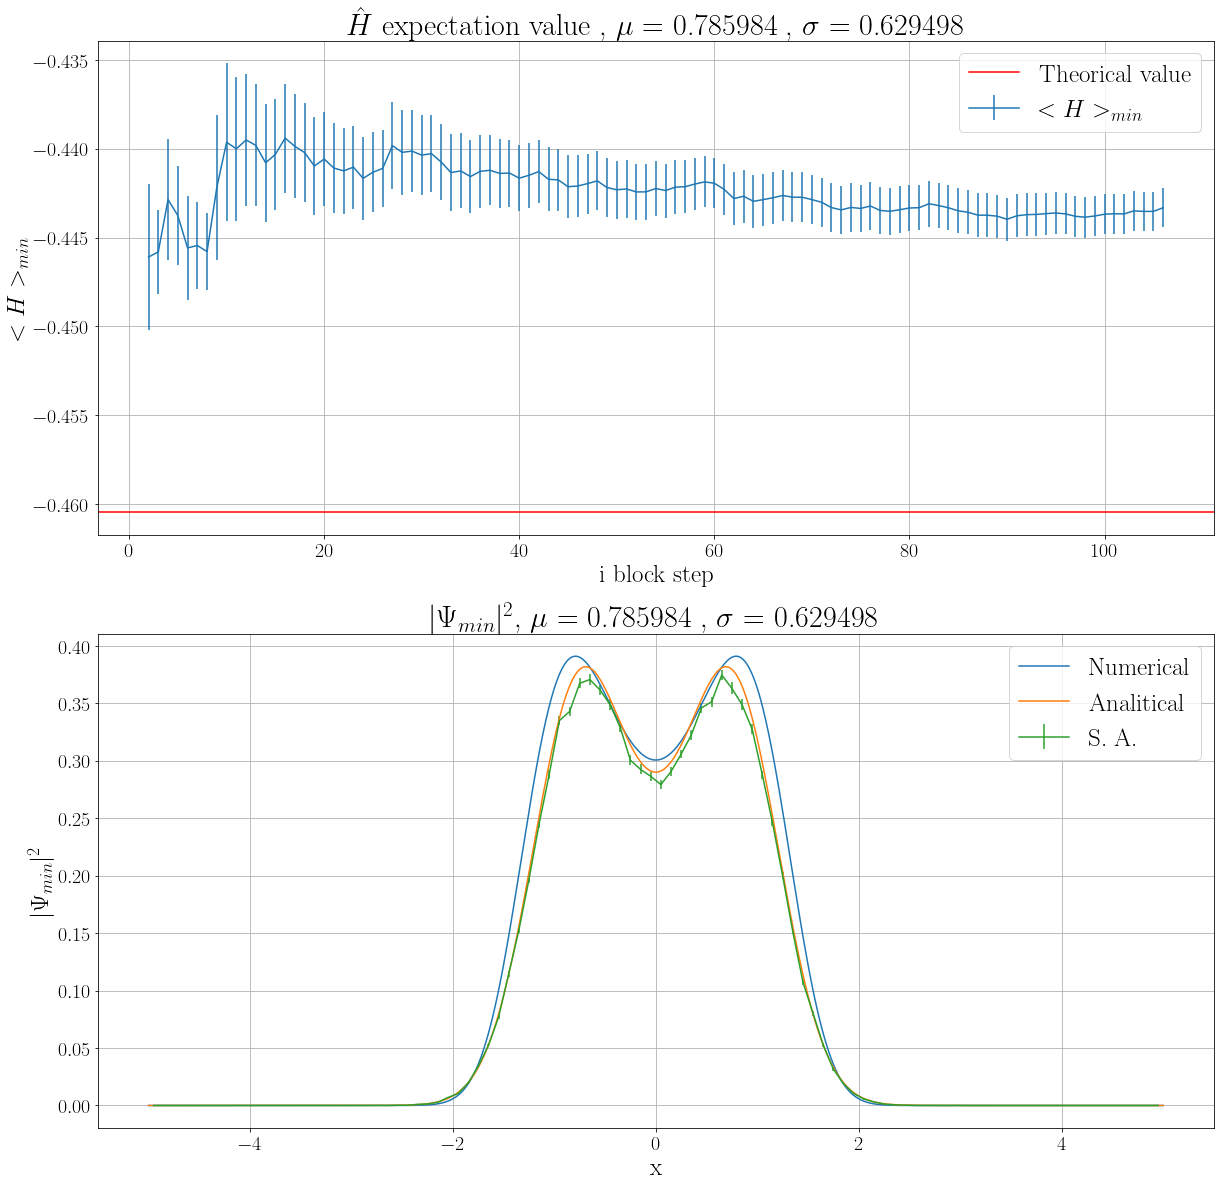

In [317]:
N_block ,Y_vec , Y_vec_err = load_Y_data("VMC_SA/output_Have.dat")
x_vec , Psi_vec , Psi_vec_err = load_Psi_data("VMC_SA/output_PsiT2.dat")


mu_min = 0.785984
sigma_min = 0.629498
e_min = -0.446033
e_min_err = 0.000837152


def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

print("Estimated energy minimum: ", e_min, " +/- " , e_min_err)
print("Mu min: " , mu_min)
print("Sigma min: " , sigma_min)


# Plot a few things
scale = 0.3
fig , axes = plt.subplots(2 , figsize=(20, 20) )

axes[0].axhline( E[0],  color = 'r' , label="Theorical value")
plot_Y_data(axes[0] , N_block , Y_vec , Y_vec_err , "$<H>_{min}$"  , "$<H>_{min}$" , mu_min , sigma_min)



axes[1].plot( x,(psi[0])**2 , label = "Numerical")
axes[1].plot(x, (1/2.90092) * (np.exp(-(x-mu_min)**2/(2*sigma_min**2)) +  np.exp(-(x+mu_min)**2/(2*sigma_min**2)))**2 , label="Analitical")
plot_Psi_data(axes[1] , x_vec ,Psi_vec , Psi_vec_err ,"S. A.", mu_min , sigma_min)


- I valori di minimo dei due parametri risultano essere $(\mu_{min},\sigma_{min}) = (0.785984, 0.629498)$
- Il primo grafico raffigura l'andamento dell'energia all'aumentare del numero di blocchi per la configurazione di minimo. L'energia non sembra essere compatibile con il valore atteso, ottenuto tramite risoluzione numerica dell'equazione agli autovalori dell'Hamiltoniana data (vd. cella sopra). La causa più probabile è che il processo di ottimizzazione vada a trovare solamente un'approssimazione del valore minimo, andandosi a stabilizzare solamente in un minimo locale.
- Nel secondo plot viene raffigurato il risultato del campionamento stocastico, confrontato con il rispettivo andamento analitico, opportunamente normalizzato, della densità di probabilità $\left |\Psi_T(x)^{\sigma_{min},\mu_{min}} \right |^2$ e con l'autovettore $\left |\Psi_{{min}}\right |^2$, ottenuto dal metodo numerico di soluzione dell'equazione agli autovalori. La coincidenza tra l'andamento analitico e quello stocastico (*S.A.*) è ovviamente quasi perfetto, mentre, come per il caso dell'energia, anche l'autovettore ottenuto dall'ottimizzazione non risulta compatibile con il risultato numerico